In [8]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import pickle
import pandas as pd

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

scipy.stats.poisson.cdf(): It is used for the cumulative distribution function.
scipy.stats.poisson.mean(): It is used to find the mean related to the normal distribution.
pmf()  :probability mass function value for a random variable

The probability that in a single year are observed 15 or more hurricances is :  0.22171227900731788 %


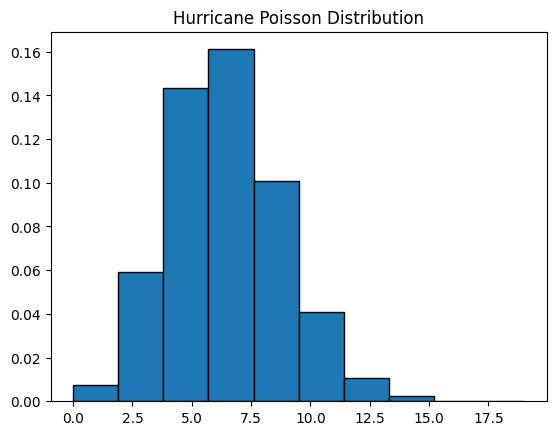

In [9]:
def hurriane():
    # probablity in a single year are observed 15 or more hurricanes
    mean = 6.3
    std = sqrt(6.3)
    hurricane_15 = poisson.pmf(15, 6.3)
    hurriane_more_15 = 1- poisson.cdf(15, 6.3)
    sum = (hurriane_more_15 + hurricane_15) * 100
    print("The probability that in a single year are observed 15 or more hurricances is : " ,sum ,'%')
    #generate Poisson distribution with sample size 10000
    x = poisson.rvs(mu=6.3, size=10000)

    #create plot of Poisson distribution
    plt.hist(x, density=True, edgecolor='black')
    plt.title('Hurricane Poisson Distribution')

hurriane()

The z-score is :  3.4661629670697414


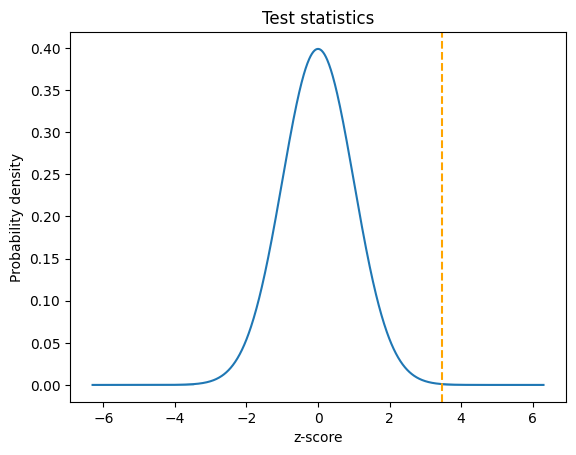

In [10]:
from scipy import stats


def calculate_z_score():
    mean = 6.3
    std = sqrt(6.3)
    Z = (15 - mean) / std
    print("The z-score is : ", Z)
    # plot the test statistics and its pdf
    xs = np.linspace(-6.3, +6.3, 1000)
    ts = stats.norm.pdf(xs)
    plt.plot(xs, ts)
    plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
    plt.axvline(Z, linestyle='--', color='orange')
    #plt.axvline(-Z, linestyle='--', color='blue')
    plt.title("Test statistics")
    plt.ylabel("Probability density")
    plt.xlabel("z-score")
    plt.show()
    return Z
    
z = calculate_z_score()

The p-value is :  0.00026397158691493505


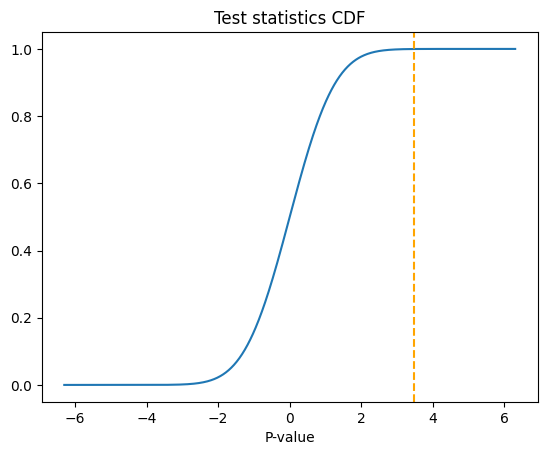

In [11]:
def calculate_p_value(Z):

    p_value = (1. - stats.norm.cdf(Z))
    print("The p-value is : ", p_value)
    xs = np.linspace(-6.3, +6.3, 1000)
    cs = stats.norm.cdf(xs)
    plt.plot(xs, cs)
    plt.axvline(Z, linestyle='--', color='orange')
    #plt.axvline(-Z, linestyle='--', color='blue')
    plt.title("Test statistics CDF")
    plt.xlabel("P-value")
    plt.show()

calculate_p_value(z)

####  Answer to question 1:
- Probablity of observing 15 or more hurricanes in one year is 0.22171227900731788 %
- Z score is 3.466, more than 3
- P value is less than 5% 

Based on data above, we can conclude that 15 hurricanes in a year this data is significantly different.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

t-test : compare the means of two data samples ,it determines a probability that two populations are the same with respect to the variable tested.
- are independent 
- are normally distributed
- have similiar amount of variance with each group



The t-statistics is :  -3.991846326292112


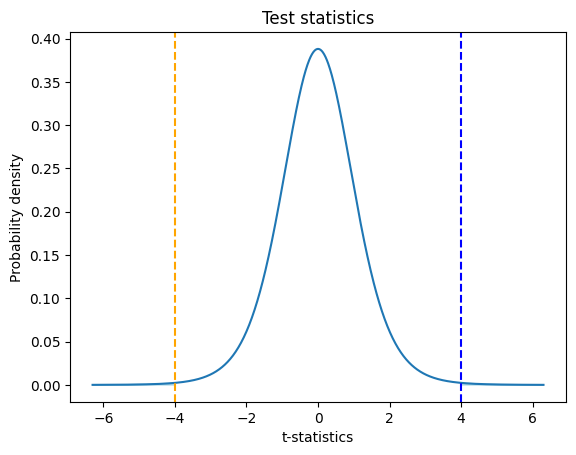

The p-value is :  0.0031489409354536393
P value is smaller than 0.05, so we can reject the null hypothesis, which means that the result is significant. And there is significant after using halogen lamps.  


In [12]:
# Using the formula to calculate the T value

def T_test_formula():
    N = 10
    pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
    post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
    
    # calculate the std
    pre_std = np.sqrt(np.var(pre))
    post_std = np.sqrt(np.var(post))
    # calculate the std_total

    std_total = sqrt((pre_std**2 + post_std**2)/2)

    # calculate the t-statistics
    T = (np.mean(pre) - np.mean(post)) / (std_total * sqrt(2/N))
    print("The t-statistics is : ", T)

    # plot the test statistics and its pdf
    xs = np.linspace(-6.3, +6.3, 1000)
    ts = stats.t.pdf(xs, df= N-1)
    plt.plot(xs, ts)
    plt.fill_between(xs, ts,where=np.abs(xs) > np.abs(T), color='lightblue')
    plt.axvline(T, linestyle='--', color='orange')
    plt.axvline(-T, linestyle='--', color='blue')
    plt.title("Test statistics")
    plt.ylabel("Probability density")
    plt.xlabel("t-statistics")
    plt.show()

    # calculate the p-value
    p_value = stats.t.cdf(T, N - 1) + (1. - stats.t.cdf(-T, N - 1))
    print("The p-value is : ", p_value)
    print('P value is smaller than 0.05, so we can reject the null hypothesis, which means that the result is significant. And there is significant after using halogen lamps.  ')


T_test_formula()


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

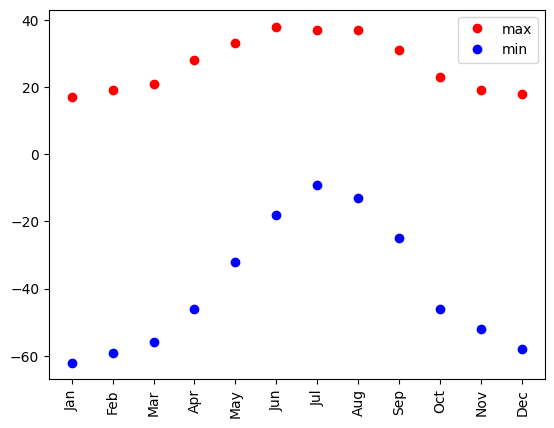

In [13]:
max_temp = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_temp = np.array([ -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(0,12)

plt.plot(months, max_temp, 'ro')
plt.plot(months, min_temp, 'bo')
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
labels2 = ['max', 'min']
plt.xticks(months, labels, rotation='vertical')
plt.legend(labels2)
plt.show()

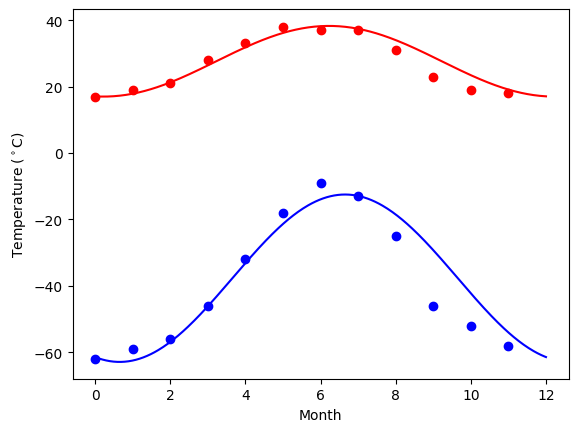

In [14]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = curve_fit(yearly_temps, months,
                                      max_temp, [20, 10, 0])
res_min, cov_min = curve_fit(yearly_temps, months,
                                      min_temp, [-40, 20, -2])

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

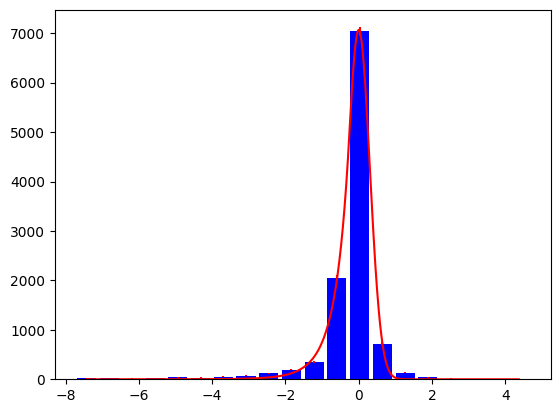

In [33]:
unpickled_df = pd.read_pickle('data/residuals_261.pkl')
df = pd.DataFrame(unpickled_df.tolist())
data = df['residuals']

mu = data.mean()
std = data.std()
_min = mu - std - 3
_max = mu + std + 3
data_denoise = data[(data > _min) & (data < _max)]

nbin = 20
h, bins = np.histogram(data_denoise, bins=nbin)
bin_centers = (bins[1:] + bins[:-1]) / 2
sigma_y = np.sqrt(h)
w = bins[1] - bins[0] - 0.1
plt.bar(bin_centers, h, color='blue', width=w)
plt.errorbar(x=bin_centers, y=h, yerr=sigma_y, fmt="none", color="r", label="Errors")

def cb(x, a, beta, m, s):
    return a * stats.crystalball.pdf(x, beta, m, scale=s)

params, cov =  curve_fit(cb, bin_centers, h, p0 = [20000, 0.4, 3, 0.1])
x = np.linspace(bin_centers[0], bin_centers[-1], 1000)
y = cb(x, *params)

plt.plot(x, y, color='red')
plt.show()


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

best-fit params for f(t): a=-10.01800059190969, b=-0.24087840726531506, c=9.351029275821476
best-fit params for g(t): a=-10.020017104800742, b=0.9995697087884203, c=5.194849021823711, d=9.3468377679031


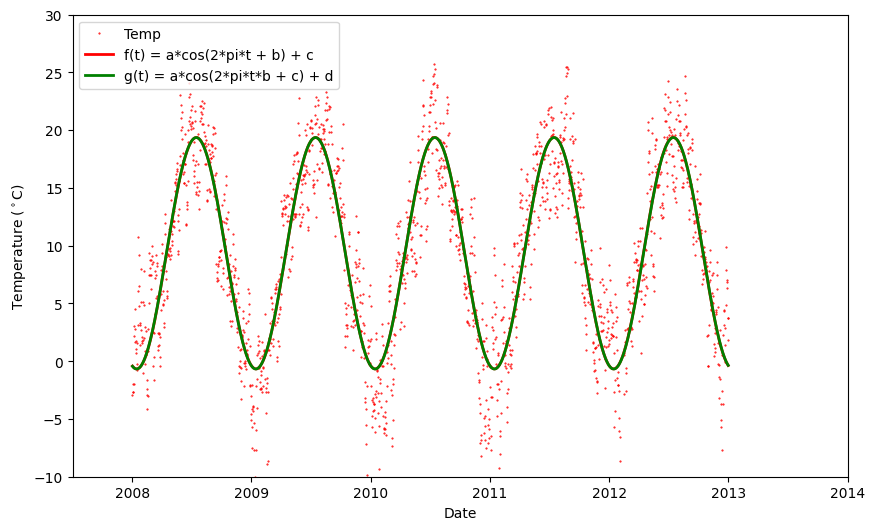

In [279]:
df = pd.read_csv('data/munich_temperatures_average_with_bad_data.txt', sep=" ", header=0, names=["date", "temp"])
#print(df.head(5))
df_new = df[(df['date'] >= 2008.00000) & (df['date'] < 2013.00000)]
#print(df_new.head(5))
date = df_new['date']
temp = df_new['temp']

def f(t,a,b,c):
    y = a*np.cos(2* np.pi * t + b) + c
    return y
#f(1,1,0,0)
res, cov = curve_fit(f,date,temp, [10,0.5,20])
a, b, c = res
print(f"best-fit params for f(t): a={a}, b={b}, c={c}")


def g(t,a,b,c,d):
    y = a*np.cos(2* np.pi * b * t + c) + d
    return y
#g(1,1,1,0,0)

res_g, cov_g = curve_fit(g,date,temp,[10,1,0.5,20])
a, b, c, d = res_g
print(f"best-fit params for g(t): a={a}, b={b}, c={c}, d={d}")


plt.figure(figsize=(10,6))
plt.axis([2007.5, 2014, -10, 30])
plt.plot(date, temp, 'ro', markersize=0.5)
plt.plot(date, f(date, *res), 'r-', linewidth=2)
plt.plot(date, g(date, *res_g), 'g-', linewidth=2)

labels = ['Temp','f(t) = a*cos(2*pi*t + b) + c','g(t) = a*cos(2*pi*t*b + c) + d']
plt.legend(labels)
plt.xlabel('Date')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

f_after_fit = f(date, *res)
g_after_fit = g(date, *res_g)




In [280]:

#overal temperature in Munich bwtween 2008 and 2012
temp_overall = np.mean(temp)
print(f"overal temperature in Munich: {temp_overall}")
# highest and lowest temperature in Munich bwtween 2008 and 2012 predited by model
temp_max = np.max(f_after_fit)
temp_min = np.min(f_after_fit)
print(f"highest temperature in Munich: {temp_max} degrees ")
print(f"lowest temperature in Munich: {temp_min} degrees")


overal temperature in Munich: 9.352349012705366
highest temperature in Munich: 19.368822915679818 degrees 
lowest temperature in Munich: -0.6669713064284668 degrees


a = amplitude (the height of each peak above the baseline)
c = vertical offset
b=  the phase shift.


### b means phase shift.Meaning how much the cosine funtion max and min value shifted left or right. In here means, the date to reach hottest days shifted how much.

In [281]:
alpha = 0.05
# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval


y = df_new['temp']
tss = np.sum((np.mean(y) - y)**2)

ssr_f = np.sum((f_after_fit - y)**2)
rf = 1- ssr_f/tss
ndof_1 = 3 - 1 # 3 parameters - 1 

ssr_g = np.sum((g_after_fit - y)**2)
rg = 1- ssr_g/tss
ndof_2 = 4 - 1 # 4 parameters - 1

print(f"SSR of f(x): {ssr_f}, R = {rf}")
print(f"SSR of g(x): {ssr_g}, R = {rg}")

N = len(y)

print("Test f(x) vs g(x):")
pval_1_vs_2 = Ftest(ssr_f, ssr_g, ndof_1, ndof_2, N, verbose=True)

SSR of f(x): 40376.572228258934, R = 0.6941079730563188
SSR of g(x): 40375.279978060054, R = 0.6941177631155249
Test f(x) vs g(x):
p-value: 0.809 , additional parameter necessary: NO
